In [3]:
import os

BASE_PATH = "/content/drive/MyDrive"
CAT_PATH = os.path.join(BASE_PATH, "Cat")
DOG_PATH = os.path.join(BASE_PATH, "Dog")

print("Cats:", len(os.listdir(CAT_PATH)))
print("Dogs:", len(os.listdir(DOG_PATH)))


Cats: 12499
Dogs: 12499


In [4]:
!pip install scikit-image opencv-python

In [5]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [10]:
IMG_SIZE = 48
MAX_IMAGES = 2000

features = []
labels = []

def load_images_from_folder(folder, label):
    count = 0
    for file in os.listdir(folder):
        if count >= MAX_IMAGES // 2:
            break

        img_path = os.path.join(folder, file)

        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        hog_feat = hog(
            img,
            orientations=6,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm='L2-Hys'
        )

        features.append(hog_feat)
        labels.append(label)
        count += 1

# Load dataset
load_images_from_folder(CAT_PATH, 0)
load_images_from_folder(DOG_PATH, 1)

features = np.array(features)
labels = np.array(labels)

print("Total samples:", features.shape[0])


Total samples: 2000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=42,stratify=labels)


In [12]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.695

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69       200
           1       0.69      0.70      0.70       200

    accuracy                           0.69       400
   macro avg       0.70      0.70      0.69       400
weighted avg       0.70      0.69      0.69       400



In [21]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return "Invalid image"

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hog_feat = hog(
        img,
        orientations=6,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )

    pred = svm.predict([hog_feat])[0]
    return "Dog" if pred == 1 else "Cat"


In [22]:
print(predict_image(CAT_PATH + "/0.jpg"))

Cat


<Figure size 640x480 with 0 Axes>

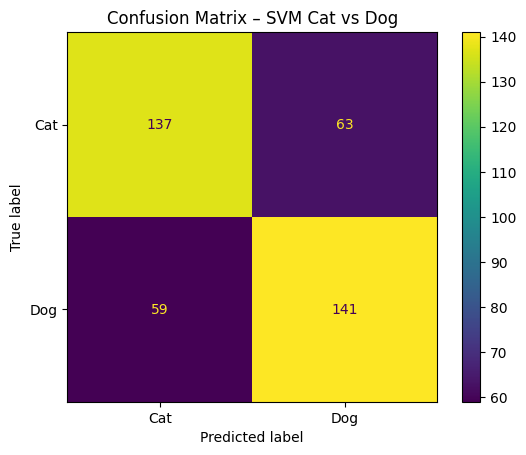

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=["Cat", "Dog"])
disp.plot()
plt.title("Confusion Matrix – SVM Cat vs Dog")
plt.show()


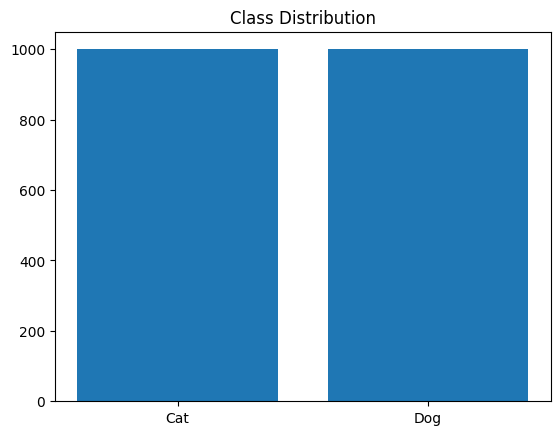

In [19]:
plt.figure()
plt.bar(["Cat", "Dog"],
        [np.sum(labels == 0), np.sum(labels == 1)])
plt.title("Class Distribution")
plt.show()


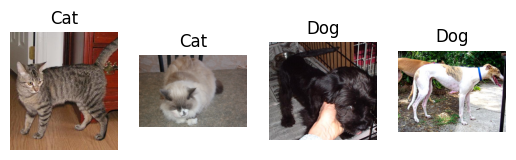

In [27]:
def show_sample_predictions():
    sample_images = [
        os.path.join(CAT_PATH, os.listdir(CAT_PATH)[50]),
        os.path.join(CAT_PATH, os.listdir(CAT_PATH)[10]),
        os.path.join(DOG_PATH, os.listdir(DOG_PATH)[50]),
        os.path.join(DOG_PATH, os.listdir(DOG_PATH)[60])
    ]

    plt.figure()
    for i, img_path in enumerate(sample_images):
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

        hog_feat = hog(
            img_gray,
            orientations=6,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm='L2-Hys'
        )

        pred = svm.predict([hog_feat])[0]
        label = "Dog" if pred == 1 else "Cat"

        plt.subplot(1, 4, i + 1)
        plt.imshow(img_rgb)
        plt.title(label)
        plt.axis("off")

    plt.show()

show_sample_predictions()
